In [28]:
# ROC curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns

In [29]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier   # k 근접 이웃
from sklearn.ensemble import RandomForestClassifier  # 앙상블_ 랜덤 포레스트 / 앙상블이란 짬뽕이다!
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
# roc curve 함수 정의

def plot_roc_curve(fpr, tpr) :
    plt.plot(fpr, tpr, color = 'purple', label='ROC')
    plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('Receiver Operating characteristics(ROC)')
    plt.legend
    plt.show()
# fpr(false positive rate) 특이도 틀리도 ^^
# tpr(true positive rate)  민감도 재율  

In [31]:
data_X, class_label = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

In [32]:
# Train, Test 분리
train_X, test_X, train_y, test_y = train_test_split(data_X, class_label, test_size=0.3, random_state=1)

In [33]:
# random forest model 적용

model = RandomForestClassifier()
model.fit(train_X, train_y)  # fit은 반드시 train data

RandomForestClassifier()

In [34]:
# 테스트 데이터 셋으로 예측(확률 예측)

print(model.predict(test_X))  # 모델 예측 결과 값

[0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0
 1 1 1 0]


In [35]:
model.predict_proba(test_X)

array([[0.97, 0.03],
       [0.06, 0.94],
       [0.93, 0.07],
       [0.98, 0.02],
       [0.03, 0.97],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.03, 0.97],
       [0.13, 0.87],
       [0.93, 0.07],
       [0.21, 0.79],
       [0.03, 0.97],
       [0.93, 0.07],
       [0.22, 0.78],
       [0.16, 0.84],
       [0.95, 0.05],
       [0.15, 0.85],
       [0.91, 0.09],
       [0.08, 0.92],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.72, 0.28],
       [0.2 , 0.8 ],
       [0.15, 0.85],
       [0.15, 0.85],
       [0.17, 0.83],
       [0.97, 0.03],
       [0.16, 0.84],
       [0.14, 0.86],
       [0.06, 0.94],
       [0.97, 0.03],
       [0.9 , 0.1 ],
       [0.2 , 0.8 ],
       [0.27, 0.73],
       [0.23, 0.77],
       [0.89, 0.11],
       [0.98, 0.02],
       [0.85, 0.15],
       [0.14, 0.86],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.27, 0.73],
       [0.98, 0.02],
       [0.78, 0.22],
       [0.26, 0.74],
       [0.96, 0.04],
       [0.33, 0.67],
       [0.2 ,

In [36]:
probs = model.predict_proba(test_X)

In [37]:
# 성능 평가 
#  positive
probs[:,1]

array([0.03, 0.94, 0.07, 0.02, 0.97, 0.85, 0.83, 0.97, 0.87, 0.07, 0.79,
       0.97, 0.07, 0.78, 0.84, 0.05, 0.85, 0.09, 0.92, 0.01, 0.06, 0.28,
       0.8 , 0.85, 0.85, 0.83, 0.03, 0.84, 0.86, 0.94, 0.03, 0.1 , 0.8 ,
       0.73, 0.77, 0.11, 0.02, 0.15, 0.86, 0.04, 0.03, 0.73, 0.02, 0.22,
       0.74, 0.04, 0.67, 0.8 , 0.76, 0.05, 0.01, 0.8 , 0.04, 0.05, 0.09,
       0.09, 0.8 , 0.86, 0.19, 0.09, 0.47, 0.  , 0.95, 0.11, 0.11, 0.36,
       0.02, 0.5 , 0.93, 0.52, 0.84, 0.01, 0.88, 0.01, 0.03, 0.91, 0.02,
       0.97, 0.9 , 0.86, 0.03, 0.05, 0.69, 0.89, 0.22, 0.79, 0.01, 0.04,
       0.56, 0.7 , 0.87, 0.92, 0.43, 0.06, 0.9 , 0.14, 0.96, 0.82, 0.04,
       0.05, 0.82, 0.01, 0.85, 0.03, 0.06, 0.94, 0.1 , 0.77, 0.47, 0.78,
       0.86, 0.  , 0.82, 0.89, 0.95, 0.99, 0.88, 0.04, 0.9 , 0.04, 0.07,
       0.  , 0.04, 0.96, 0.75, 0.09, 0.88, 0.93, 0.87, 0.93, 0.88, 0.02,
       0.94, 0.81, 0.45, 0.78, 0.  , 0.84, 0.93, 0.82, 0.93, 0.69, 0.09,
       0.04, 0.91, 0.16, 0.8 , 0.22, 0.13, 0.77, 0.

In [38]:
probs = probs[:,1]

In [39]:
# auc 구하기

roc_auc_score(test_y, probs) # test data의 실제값, 예측값

0.9515065073988234

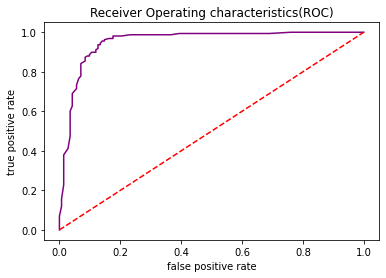

In [40]:
auc = roc_auc_score(test_y, probs)

# roc curve 곡선 그리기
fpr, tpr, thresholds = roc_curve(test_y, probs)
plot_roc_curve(fpr, tpr)